# Global Optimization

Optimization tasks are usually focused on finding a global maximum (or minimum). Sometimes deterministic search methods get stuck in a local optimum and never find the global optimal solution. Stochastic methods, such as Monte Carlo methods, can help escape these local optimal solution in order to move closer towards the global optimal solution. 

In most real-world tasks, you may never find the global maximum, but usually the closer we get the better.

# Simulated Annealing

Simulated annealing is a proposed alternative to genetic [greedy search](https://pdfs.semanticscholar.org/presentation/5cc7/16b5b0ef1fb96fc74d1239248f40ac747c6d.pdf), [hill climbing algorithms](https://en.wikipedia.org/wiki/Hill_climbing). A hill climbing algorithm is really good at finding local optimal solutions, but does not perform well with global solutions.

## Basic hill climbing (local search) algorithm

Given a function $f(\cdot)$ we're trying to maximize (or minimize)

1. $x_0$ = starting solution (can be random)

2. for i in 1:N, do

    1. look around the neighborhood of $x_{i-1}$ by some $\delta$, and evaluate $f(x \pm \delta)$
    
    2. Choose the neightbor with the highest (or lowest) value for $f(\cdot)$

3. Return the $x_i$ value with the highest (or lowest) value of $f(\cdot)$. This will usually be the last value as the hill climbing algorithm never chooses a step that does not improve in $f(\cdot)$; therefore, it will never climb down (or up) from a local maximum (or minimum).

An improvement on the above algorithm is one with random restarts, but that still faces the problem of never actually escaping a local optimum.

## Simulated Annealing algorithm

The main difference (in strategy) between greedy search and simulated annealing is that greedy search will always choose the best proposal, where simulated annealing has a probability (using a Boltzman distribution) of choosing a worse proposal than strictly only accepting improvements. This helps the algorithm find a global optimum by jumping out of local optimum. 


The SA algorithm goes as follows

1. Generate an initial candidate solution $x$

2. Get an initial Temperature $T > 0$.

3.  `for i in 1:N` (`N` = number of iterations)

    1. Sample $\zeta \sim g(\zeta)$ where $g$ is a symmetrical distribution.

    2. The new candidate solution is $x' = x \pm \zeta$

    3. Accept the candidate solution, $x = x'$ with probability $p = exp\left( 
\Delta h/ T_i \right)$, else accept $x = x$; $\Delta h = h(x') - h(x)$

    4. Update the temperature (cooling), e.g. $T = \alpha T$ where $0 < \alpha < 1$


Notes on parameters:

Good starting values for $T$ will vary problem by problem. I usually start with 1, 10, 100 and adjust after a few experiments. For $\alpha$, I normally choose 0.95. However, you can change $T$ by any amount, Robert and Casella suggest 

> a temperature decrease in $1/log(1 + i)$ for `i in 1:N`

For a review of cooling schedules, I recommend reading [A comparison of simulated annealing cooling strategies](https://www.fys.ku.dk/~andresen/BAhome/ownpapers/permanents/annealSched.pdf)


### References: 

- Introduction to Monte Carlo Methods with R by Robert and Casella
- [Optimization by Simulated Annealing: An Experimental Evaluation; Part I, Graph Partitioning](http://faculty.washington.edu/aragon/pubs/annealing-pt1.pdf)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def h(x):
    if x < -1 or x > 1:
        y = 0
    else:
        y = (np.cos(50*x) +  np.sin(20*x))
    return y

hv = np.vectorize(h)  # vectorize the function

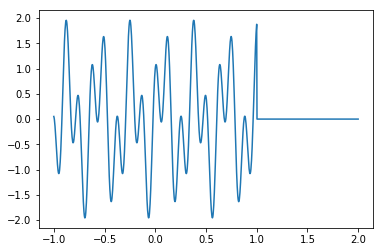

In [3]:
X = np.linspace(-1, 2, num=1000)
plt.plot(X, hv(X))

Maximum: http://www.wolframalpha.com/input/?i=max(cos(50*x)+%2B++sin(20*x))

In [4]:
def simple_greedy_search(func, start=0, N=100):
    x = start
    history = []
    for i in range(N):
        history.append(x) ## keep track of steps
        u = 0.001 #np.random.rand() # some noise
        xleft, xright = x-u, x+u # look around the neightborhood
        yleft, yright = func(xleft), func(xright)
        if yleft > yright:
            x = xleft
        else:
            x = xright
    return x, history

In [5]:
x0, history = simple_greedy_search(hv, start=-0.02, N=100)

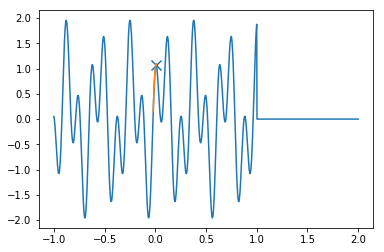

In [6]:
plt.plot(X, hv(X))
plt.scatter(x0, h(x0), marker='x', s = 100)
plt.plot(history, hv(history))

In [7]:
def SA(search_space, func, T):
    scale = np.sqrt(T) ## Suggested by Robert & Casella (Intro to MC)
    start = np.random.choice(search_space)
    x = start * 1
    cur = func(x)
    history = [x]
    for i in range(1000):
        prop = x + np.random.normal()*scale #.uniform(-1, 1, size=1) * scale
        if prop > 1 or prop < 0 or np.log(np.random.rand()) * T > (func(prop) - cur):
            prop = x
        x = prop
        cur = func(x)
        T = 0.9 *T # reduce temperature by 10% each iteration
        history.append(x)
    return x, history

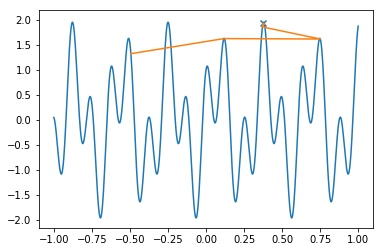

In [8]:
X = np.linspace(-1, 1, num=1000)
x1, history = SA(X, h, T = 4)

plt.plot(X, hv(X))
plt.scatter(x1, hv(x1), marker='x')
plt.plot(history, hv(history))

In [9]:
h(history[-1])

1.9374198266401548

As you see above, the solution travels around until it converges to a solution. Albeit, the simulated algorithm does a good job of escaping local optima, global optimum solutions are not guaranteed.

Also, this simulated algorithm is generic enough to be applied to combinatorial optimization problem in addition to numerical optimization problems like we saw above.